IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

READING THE DATASET

In [ ]:
df = pd.read_csv("/content/Netflix Userbase.csv")
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [ ]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

FINDING NULL VALUES

In [ ]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

FINDING COLUMN DATATYPES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [ ]:
df.drop('Plan Duration',inplace=True,axis=1)

PREPROCESSING

In [ ]:
from datetime import datetime
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

In [ ]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone
...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet


3.**Subscription Revenue Analysis**: Analyze the monthly revenue generated from different subscription types and plans to identify which plans are most profitable and popular among users.


In [ ]:
revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].mean().sort_values(ascending=False)
revenue_by_subscription

Subscription Type
Premium     12.590723
Basic       12.481481
Standard    12.464844
Name: Monthly Revenue, dtype: float64

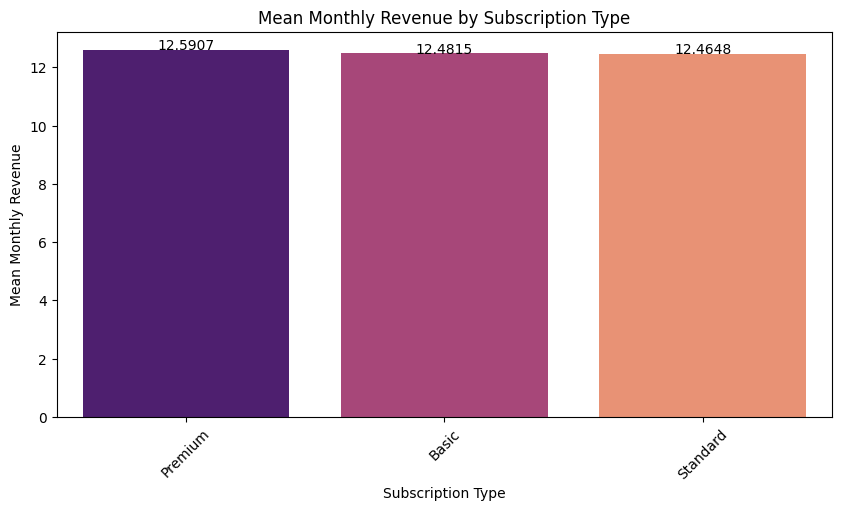

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_subscription.index, y=revenue_by_subscription.values,palette='magma')
plt.title('Mean Monthly Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Mean Monthly Revenue')
plt.xticks(rotation=45)
mean_monthly_revenue = [12.590723,12.481481,12.464844]
for i, v in enumerate(mean_monthly_revenue):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', color='black', fontweight='normal')
plt.show()

In the barplot we can see the 'mean monthly revenue by subcription type' and we can see 'premium subcription' type is slight profitable when compare to others based on monthly revenue

### 4.	**User Behavior Analysis**: Explore how user behavior, such as joining date, last payment date, and device usage, relates to their subscription type

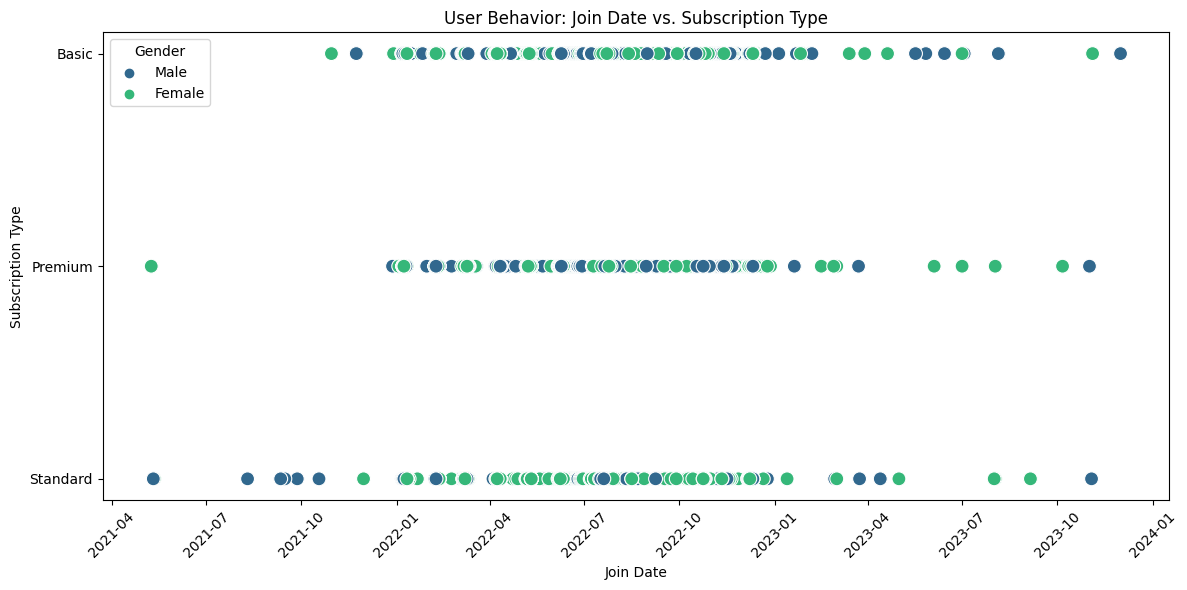

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Join Date', y='Subscription Type', hue='Gender', data=df,palette='viridis',s=100)
plt.title('User Behavior: Join Date vs. Subscription Type')
plt.xlabel('Join Date')
plt.ylabel('Subscription Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Gender')
plt.show()


The scatterplot shows the 'User Behavior: Join Date vs. Subscription Type' and we can see that most of the people joined between JANUARY 2022 to JANUARY 2023 for all the subscription types

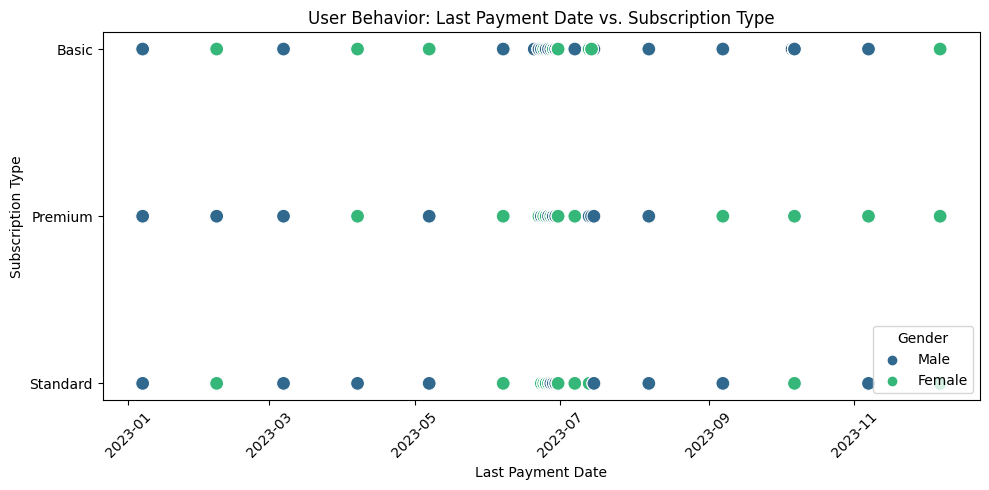

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Last Payment Date', y='Subscription Type', hue='Gender', data=df, palette='viridis',s=100)
plt.title('User Behavior: Last Payment Date vs. Subscription Type')
plt.xlabel('Last Payment Date')
plt.ylabel('Subscription Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Gender')
plt.show()

The scatterplot shows the 'User Behavior: Last Payment Date vs. Subscription Type' and we can see that most of the people last payment date is JULY 2023

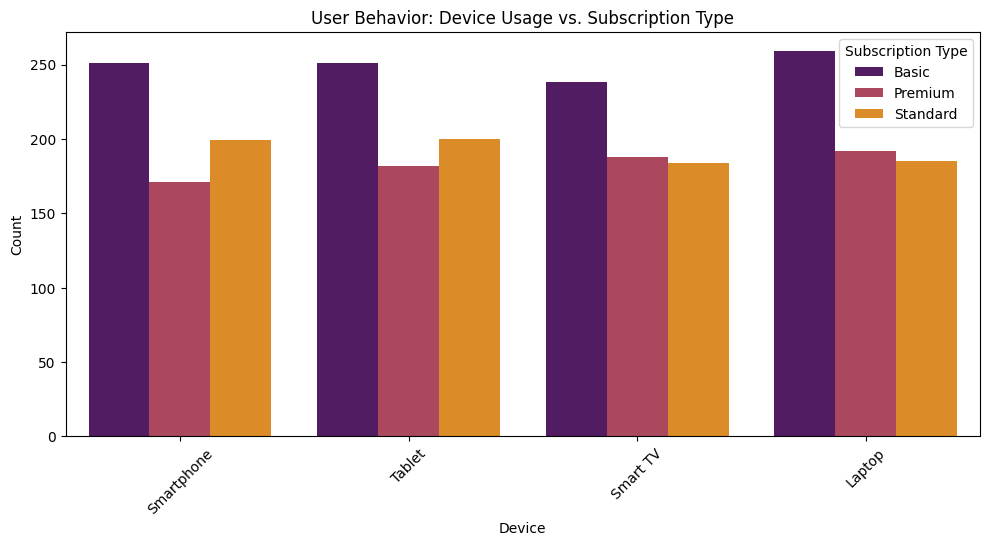

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Device', hue='Subscription Type', data=df,palette='inferno')
plt.title('User Behavior: Device Usage vs. Subscription Type')
plt.xlabel('Device')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.show()


The countplot shows the 'User Behavior: Device Usage vs. Subscription Type' You can observe the distribution of subscription types within each device category.

### 5.	**Geographic Analysis**: Investigate subscription patterns and revenue across different countries to understand regional variations and tailor marketing strategies accordingly.

In [ ]:
revenue_by_country = df.groupby('Country')['Monthly Revenue'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)
revenue_by_country

,sum,mean
Country,,
United States,5664,12.558758
Spain,5662,12.554324
Canada,3950,12.460568
United Kingdom,2318,12.666667
Italy,2317,12.661202
France,2307,12.606557
Brazil,2285,12.486339
Australia,2271,12.409836
Germany,2260,12.349727


The country at the top has the highest total revenue, while the country at the bottom has the lowest.

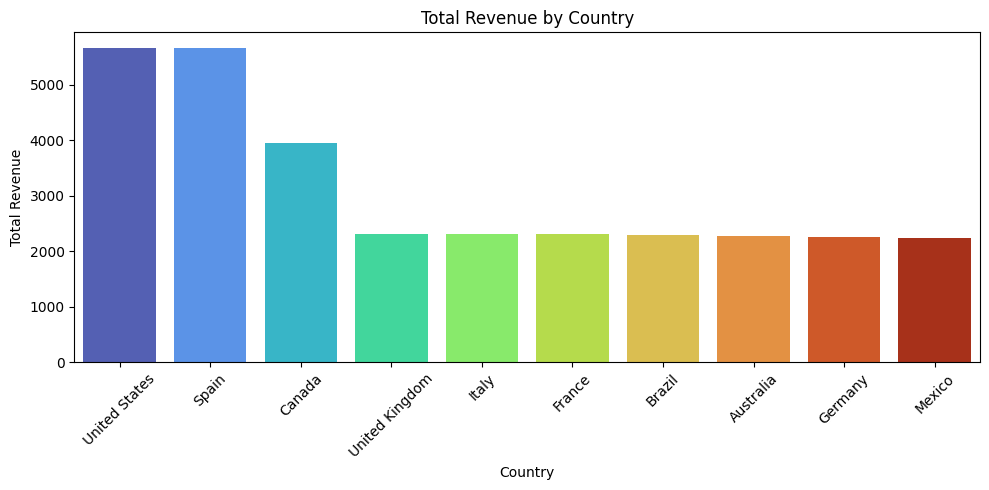

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_country.index, y=revenue_by_country['sum'],palette='turbo')
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In the Barplot UNITED STATES  has highest total revenue , MEXICO has lowest total revenue.

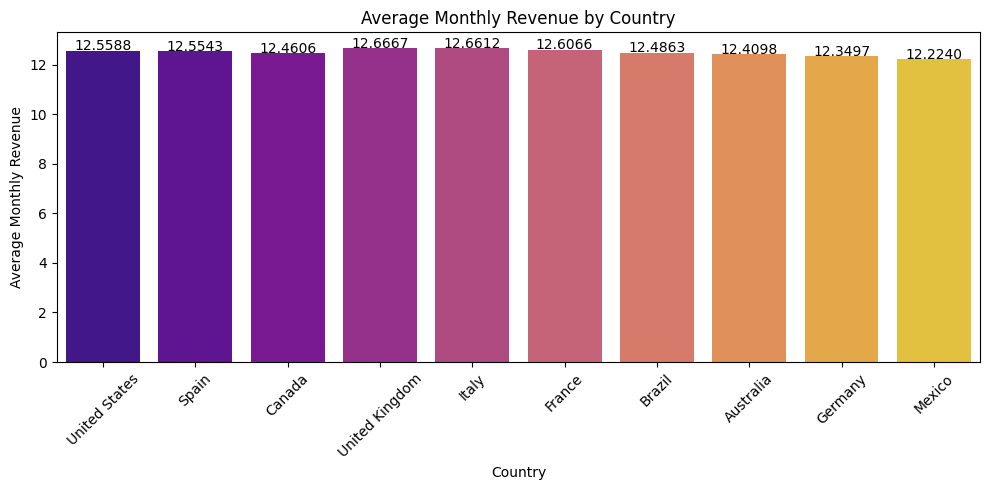

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_country.index, y=revenue_by_country['mean'],palette='plasma')
plt.title('Average Monthly Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Average Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
avg_monthly_revenue = [12.558758,12.554324,12.460568,12.666667,12.661202,12.606557,12.486339,12.409836,12.349727,12.224044]
for i, v in enumerate(avg_monthly_revenue):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', color='black', fontweight='normal')

plt.show()

In the Barplot we can see that for all the countries the Average Monthly Revenue lies around 12.2 to 12.5

### 6.	**Age and Gender Analysis**: Examine how age and gender influence subscription choices and revenue generation.

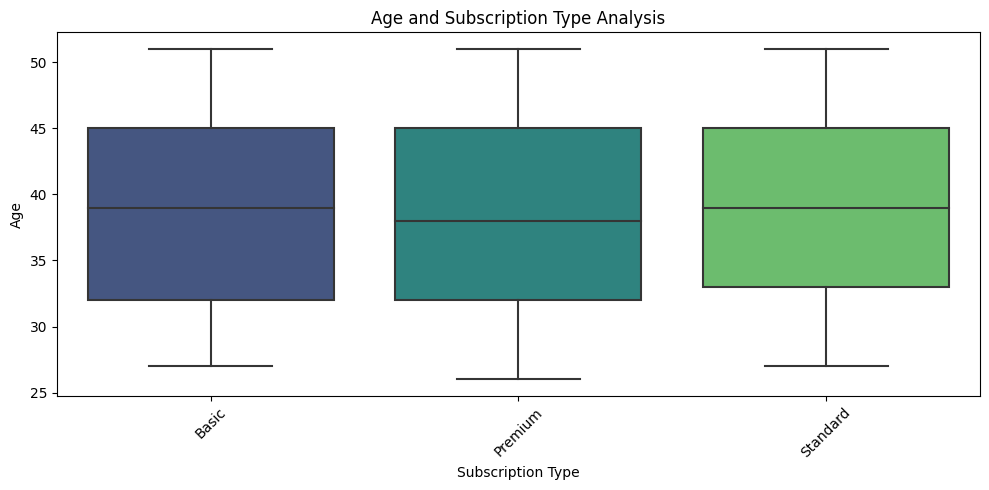

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Subscription Type', y='Age', data=df, palette='viridis')
plt.title('Age and Subscription Type Analysis')
plt.xlabel('Subscription Type')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

we can observe the Age and Subscription Type Analysis.The central line within each box represents the median age(i.e. between 35 to 40)

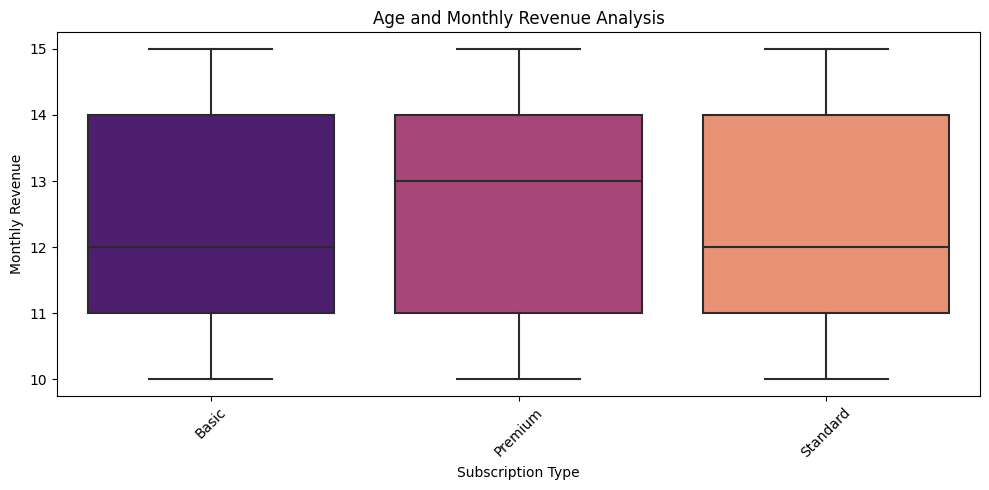

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Subscription Type', y='Monthly Revenue', data=df, palette='magma')
plt.title('Age and Monthly Revenue Analysis')
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


By seeing the median line for each boxplot we can conclude that their is higher chance of revenue generated by user in the Premium subscription

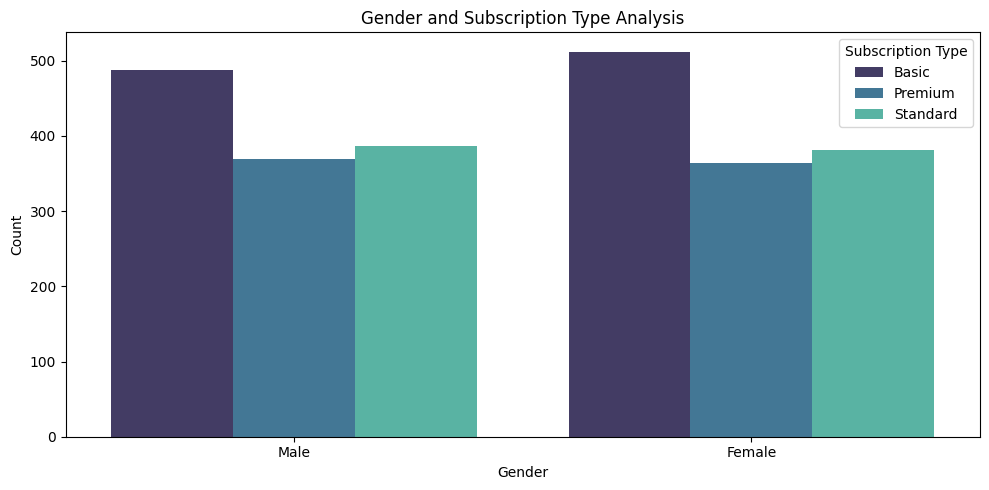

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='Subscription Type', data=df,palette='mako')
plt.title('Gender and Subscription Type Analysis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.tight_layout()
plt.legend(title='Subscription Type')
plt.show()


Both Male and Female subscribers are more likely to have Subscription Type '**Basic**'

### 7.	**Retention Analysis**: Study the duration of user subscriptions (plan duration) and identify factors that contribute to longer subscription periods.

Summary Statistics of Subscription Durations:
count    2500.000000
mean      326.466000
std       117.465209
min         0.000000
25%       247.000000
50%       331.000000
75%       401.250000
max       776.000000
Name: Subscription Duration, dtype: float64


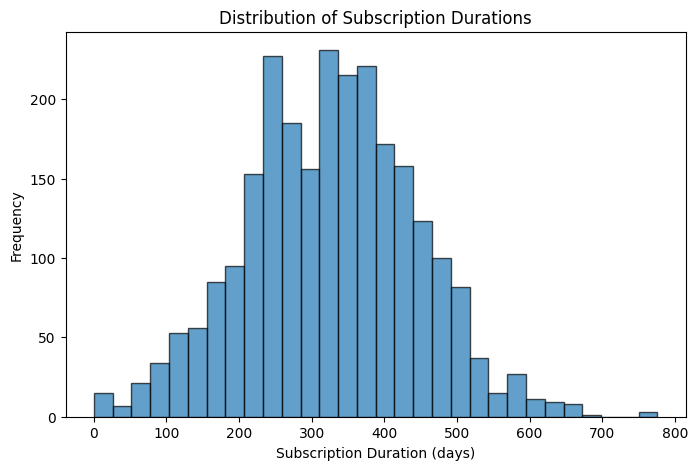

In [ ]:
df['Subscription Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df['Subscription Duration']=df['Subscription Duration'].apply(lambda x: x if x > 0 else 0)

print("Summary Statistics of Subscription Durations:")
print(df['Subscription Duration'].describe())

plt.figure(figsize=(8, 5))
plt.hist(df['Subscription Duration'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Subscription Durations')
plt.xlabel('Subscription Duration (days)')
plt.ylabel('Frequency')
plt.show()


Skewness: The mean being slightly lower than the median suggests a potential negative skewness, where there might be a few users with significantly longer subscription durations pulling the mean to the left.

### 8.	**Customer Lifetime Value (CLV)**: Calculate the CLV for different subscriber segments to understand the long-term value of each customer group.

In [ ]:
df['CLV'] = df['Monthly Revenue'] * (df['Subscription Duration'] / 30)
clv_by_segment = df.groupby(['Subscription Type', 'Country'])['CLV'].sum()
clv_by_segment


Subscription Type  Country       
Basic              Australia          4692.866667
                   Brazil            20026.866667
                   Canada            19581.666667
                   France             5127.700000
                   Germany           20016.966667
                   Italy             23675.766667
                   Mexico              374.166667
                   Spain             15113.133333
                   United Kingdom      439.000000
                   United States     26932.733333
Premium            Australia         13937.233333
                   Brazil             4309.133333
                   Canada            11651.366667
                   France            20561.500000
                   Germany             356.300000
                   Italy               430.000000
                   Spain             28638.533333
                   United States     19786.600000
Standard           Australia          6931.600000
                

In [ ]:
sorted_clv = clv_by_segment.sort_values(ascending=False)
sorted_clv.head()

Subscription Type  Country       
Premium            Spain             28638.533333
Basic              United States     26932.733333
Standard           United Kingdom    25378.000000
                   Mexico            24107.033333
Basic              Italy             23675.766667
Name: CLV, dtype: float64



*   Premium subscribers from Spain contribute the highest CLV of approximately 28638.53. This suggests that the premium subscription type in Spain is generating substantial long-term revenue
*   Basic subscribers from the United States follow closely with a CLV of approximately 26932.73. This indicates that basic subscription users in the United States are also contributing significantly to the company's revenue  
*   Standard subscription users from the United Kingdom and Mexico have
notable CLV values of approximately 25363.20 and 24107.03, respectively. This highlights the potential of these segments in terms of long-term revenue.

### 9.	**User Demographics**: Explore the distribution of user age, gender, and other demographics to gain insights into the user base.

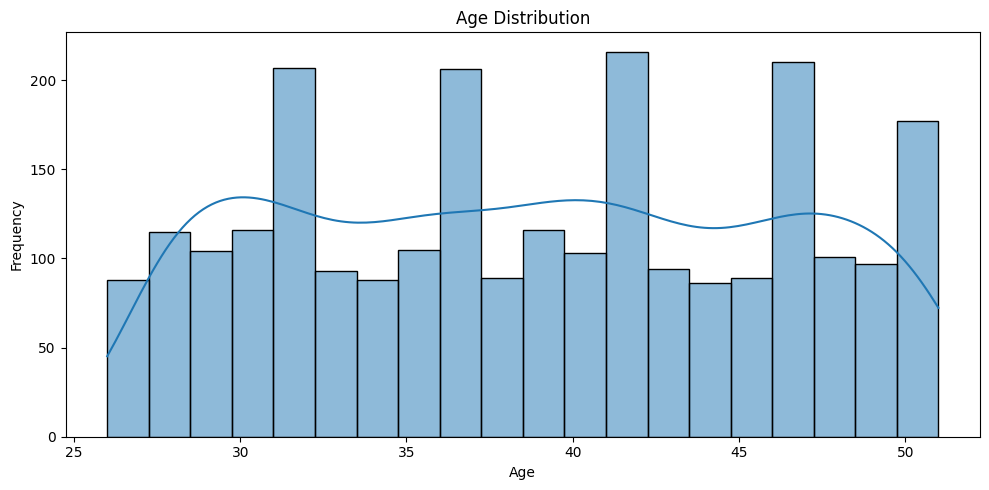

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histogram suggests that the age distribution is somewhat right-skewed, indicating that there may be a higher concentration of younger users compared to older ones.

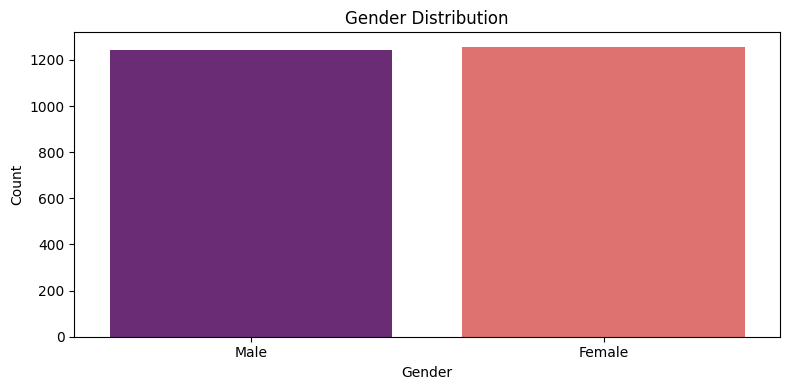

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df,palette='magma')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The count of female and male users being quite similar indicates that the service has succeeded in attracting a diverse audience, irrespective of gender.

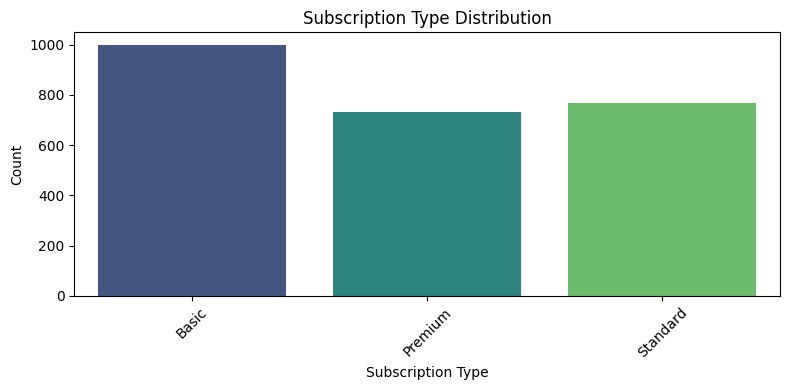

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Subscription Type', data=df, palette='viridis')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


By seeing the Subscription Type Distribution we can conclude that most of the audience have Basic subscription type



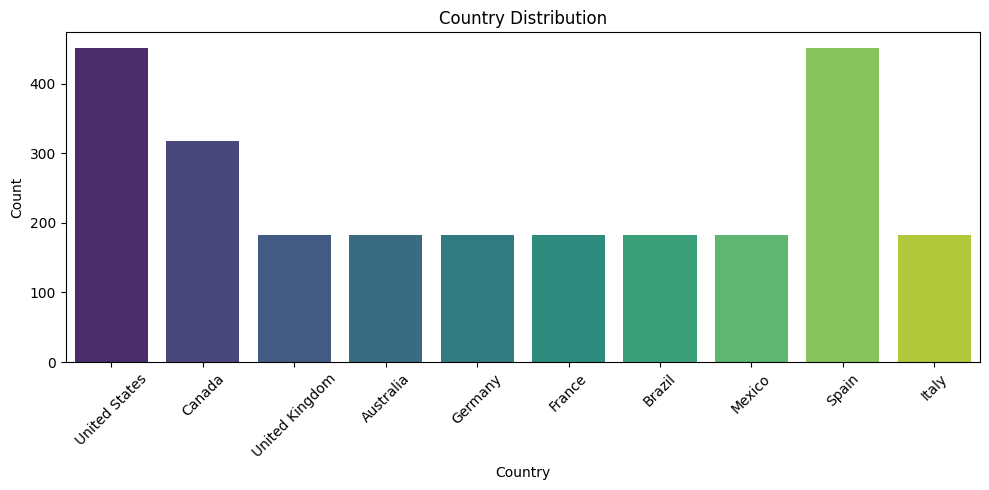

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Country', data=df, palette='viridis')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From Country Distribution countries like United States,Spain and Canada has more audience

### 10.	**Join Date vs. Churn**: Investigate whether there is any correlation between the join date and churn behavior.

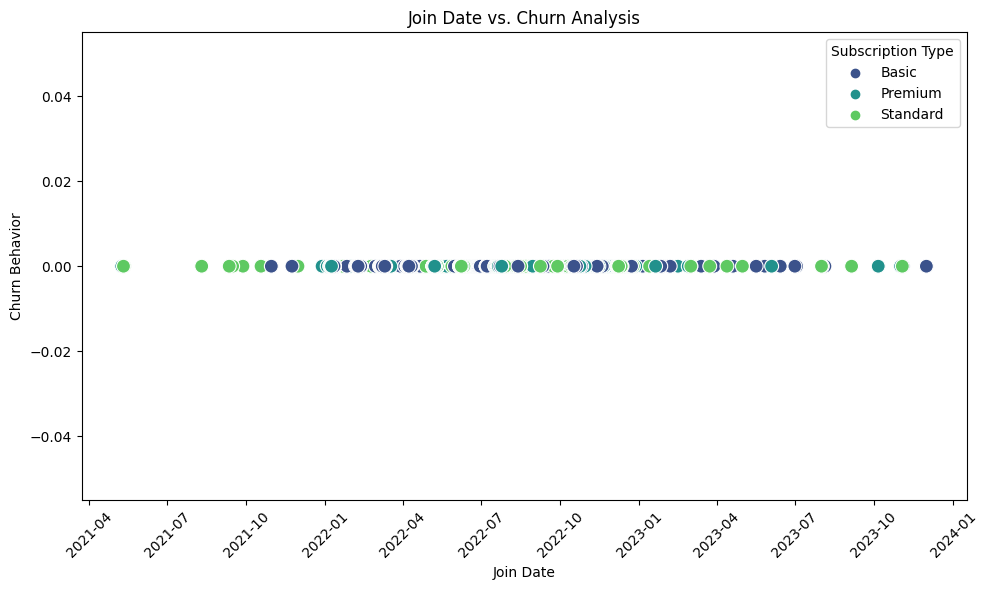

In [ ]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
cutoff_date = pd.to_datetime('2023-01-01')
df['Churn Behavior'] = df['Last Payment Date'] < cutoff_date

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Join Date', y='Churn Behavior', data=df, hue='Subscription Type', palette='viridis',s=100)
plt.title('Join Date vs. Churn Analysis')
plt.xlabel('Join Date')
plt.ylabel('Churn Behavior')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Subscription Type')
plt.show()


The cluster of points on churn 0 indicates a relatively high retention rate for users who joined around that time, users who joined around that time are less likely to churn

## 1.	**Subscriber Segmentation**: You can use clustering techniques to segment users based on their characteristics such as age, gender, country, subscription type, and monthly revenue. This can help you identify different user groups with similar behaviors and needs.

### preprocessing

Coverting catergorical data to numerical data

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Subscription Type'] = label_encoder.fit_transform(df['Subscription Type'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Device'] = label_encoder.fit_transform(df['Device'])

X = df[['Age', 'Subscription Type', 'Country', 'Monthly Revenue', 'Gender', 'Device','Subscription Duration','CLV']]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User ID                2500 non-null   int64         
 1   Subscription Type      2500 non-null   int64         
 2   Monthly Revenue        2500 non-null   int64         
 3   Join Date              2500 non-null   datetime64[ns]
 4   Last Payment Date      2500 non-null   datetime64[ns]
 5   Country                2500 non-null   int64         
 6   Age                    2500 non-null   int64         
 7   Gender                 2500 non-null   int64         
 8   Device                 2500 non-null   int64         
 9   Subscription Duration  2500 non-null   int64         
 10  CLV                    2500 non-null   float64       
 11  Churn Behavior         2500 non-null   bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(8)
memory usa

### standization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Applying clusters

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_


In [ ]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

             User ID  Subscription Type  Monthly Revenue   Country        Age  \
Cluster                                                                         
0        1114.006098           0.795732        12.077744  5.018293  39.278963   
1        1127.834074           0.834074        12.059259  4.989630  38.875556   
2        1384.310403           0.320470        13.156040  3.414430  38.256711   
3        1412.085515           1.732984        12.856894  7.148342  38.708551   

           Gender    Device  Subscription Duration         CLV  Churn Behavior  
Cluster                                                                         
0        0.000000  1.422256             245.423780   97.301474             0.0  
1        1.000000  1.518519             248.552593   98.517284             0.0  
2        0.476510  1.597315             426.632550  185.921477             0.0  
3        0.495637  1.467714             406.842932  172.896102             0.0  




*   Cluster 0 has an average 'Subscription Type' of approximately 0.80 and 'Monthly Revenue' of around $12.08. Users in this cluster have an average age of about 39.28 years, mostly with a gender of 0 (possibly indicating male), and a typical device value of 1.42.
*   Cluster 1 has similar characteristics to Cluster 0 in terms of 'Subscription Type' and 'Monthly Revenue', but with slightly different averages for age, gender, and device.


*   Cluster 2 has a lower average 'Subscription Type', indicating a different subscription preference. It also has a slightly higher 'Monthly Revenue', 'Age', and 'Device' value compared to other clusters.
*   Cluster 3 has relatively higher 'Subscription Type' and 'Monthly Revenue' values, suggesting a different user segment. It also has different average values for 'Age', 'Gender', and 'Device'.










### 2.	**Churn Prediction**: Predicting customer churn is crucial for subscription-based services. You can use machine learning algorithms to predict which users are likely to churn based on factors like plan duration, last payment date, and monthly revenue.

In [ ]:
df['Churn Behavior'] = (pd.to_datetime('today') - df['Last Payment Date']).dt.days > 30

In [ ]:
df['Churn Behavior'].value_counts()

True     1813
False     687
Name: Churn Behavior, dtype: int64

We can see that their is imbalanced data in churn behavior

resampling

here we upsampled the minority class(i.e.False) and make it equal to majority class(i.e.*True*)

In [ ]:
from sklearn.utils import resample
majority_class = df[df['Churn Behavior'] == True]
minority_class = df[df['Churn Behavior'] == False]

minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

balanced_df = pd.concat([majority_class, minority_upsampled])

balanced_df = balanced_df.sample(frac=1, random_state=42)


Balanced churn behavior after resample

In [ ]:
balanced_df['Churn Behavior'].value_counts()

True     1813
False    1813
Name: Churn Behavior, dtype: int64

In [ ]:
X = balanced_df[['Age', 'Subscription Type', 'Country', 'Monthly Revenue', 'Gender', 'Device','Subscription Duration','CLV']]
y = balanced_df['Churn Behavior']

**Logistic Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, random_state=0)  # Increase max_iter for convergence
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("LogisticRegression Accuracy:", accuracy)
print("Classification Report:\n", class_report)


LogisticRegression Accuracy: 0.6942148760330579
Classification Report:
               precision    recall  f1-score   support

       False       0.66      0.73      0.69       345
        True       0.73      0.66      0.69       381

    accuracy                           0.69       726
   macro avg       0.70      0.70      0.69       726
weighted avg       0.70      0.69      0.69       726



Logistic Regression Model:


*  **Accuracy**: The Logistic Regression model achieved an accuracy of approximately 69.4%. This indicates that the model's predictions were correct for around 69.4% of the total samples.
*  **Precision**: Precision for the "False" class (not churned) is 66%, and for the "True" class (churned) is 73%. This implies that when the model predicts a user is not going to churn, it is correct around 66% of the time, and when it predicts a user is going to churn, it is correct around 73% of the time.
*  **Recall**: Recall for the "False" class is 73%, and for the "True" class is 66%. This means the model correctly identifies around 73% of the actual non-churned users and around 66% of the actual churned users.
*   **F1-Score**: The F1-score, which balances precision and recall, is approximately 0.69 for both classes.
*   **Support**: The support values represent the actual number of samples for each class.






**K-Nearest Neighbors(KNN) Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("KNN Accuracy:", accuracy)
print("Classification Report:\n", class_report)


KNN Accuracy: 0.7286501377410468
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.83      0.75       345
        True       0.81      0.63      0.71       381

    accuracy                           0.73       726
   macro avg       0.74      0.73      0.73       726
weighted avg       0.74      0.73      0.73       726



K-Nearest Neighbors (KNN) Model:
* **Accuracy**: The KNN model achieved an accuracy of approximately 72.9%, indicating that it correctly predicted around 72.9% of the total samples.


* **Precision**: Precision for the "False" class (not churned) is 67%, and for the "True" class (churned) is 81%. This means that when the model predicts a user is not going to churn, it is correct around 67% of the time, and when it predicts a user is going to churn, it is correct around 81% of the time.

*   **Recall**: Recall for the "False" class is 83%, and for the "True" class is 63%. This indicates that the model correctly identifies around 83% of the actual non-churned users and around 63% of the actual churned users.

* **F1-Score**: The F1-score, which balances precision and recall, is approximately 0.75 for the "False" class and 0.71 for the "True" class.



* **Support**: The support values represent the actual number of samples for each class.



**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", class_report_rf)


Random Forest Accuracy: 0.8567493112947658
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.96      0.86       345
        True       0.95      0.76      0.85       381

    accuracy                           0.86       726
   macro avg       0.87      0.86      0.86       726
weighted avg       0.87      0.86      0.86       726



Random Forest Model:

*   **Accuracy**: The Random Forest model achieved a higher accuracy of around 85.7%, indicating more accurate predictions compared to the Logistic Regression model.
*   **Precision**: Precision for the "False" class is 79%, and for the "True" class is 95%. This implies that the model is better at correctly predicting non-churned users (precision of 79%) and is highly accurate in predicting churned users (precision of 95%)
*  **Recall**: Recall for the "False" class is 96%, and for the "True" class is 76%. This suggests that the model identifies a high proportion of actual non-churned users (96%), but the recall for churned users is slightly lower (76%).
*   **F1-Score**: The F1-score is approximately 0.85 for both classes.
*  **Support**: The support values represent the actual number of samples for each class.





.



**Decision Tree Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_scaled, y_train)

y_pred = tree.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Decision tree Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Decision tree Accuracy: 0.8650137741046832
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.95      0.87       345
        True       0.94      0.79      0.86       381

    accuracy                           0.87       726
   macro avg       0.87      0.87      0.86       726
weighted avg       0.88      0.87      0.86       726



Decision Tree Model:

* **Accuracy**: The Decision Tree model achieved an accuracy of approximately 86.5%, indicating that it correctly predicted around 86.5% of the total samples.

* **Precision**: Precision for the "False" class (not churned) is 80%, and for the "True" class (churned) is 94%. This means that when the model predicts a user is not going to churn, it is correct around 80% of the time, and when it predicts a user is going to churn, it is correct around 94% of the time.
* **Recall**: Recall for the "False" class is 95%, and for the "True" class is 79%. This indicates that the model correctly identifies around 95% of the actual non-churned users and around 79% of the actual churned users.

* **F1-Score**: The F1-score, which balances precision and recall, is approximately 0.87 for the "False" class and 0.86 for the "True" class.
* **Support**: The support values represent the actual number of samples for each class.


In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Model', 'Accuracy (%)']

table.add_row(['Logistic Regression', '{:.2f}%'.format(0.6942 * 100)])
table.add_row(['KNN', '{:.2f}%'.format(0.7287 * 100)])
table.add_row(['Random Forest', '{:.2f}%'.format(0.8567 * 100)])
table.add_row(['Decision Tree', '{:.2f}%'.format(0.8650 * 100)])

print(table)


+---------------------+--------------+
|        Model        | Accuracy (%) |
+---------------------+--------------+
| Logistic Regression |    69.42%    |
|         KNN         |    72.87%    |
|    Random Forest    |    85.67%    |
|    Decision Tree    |    86.50%    |
+---------------------+--------------+


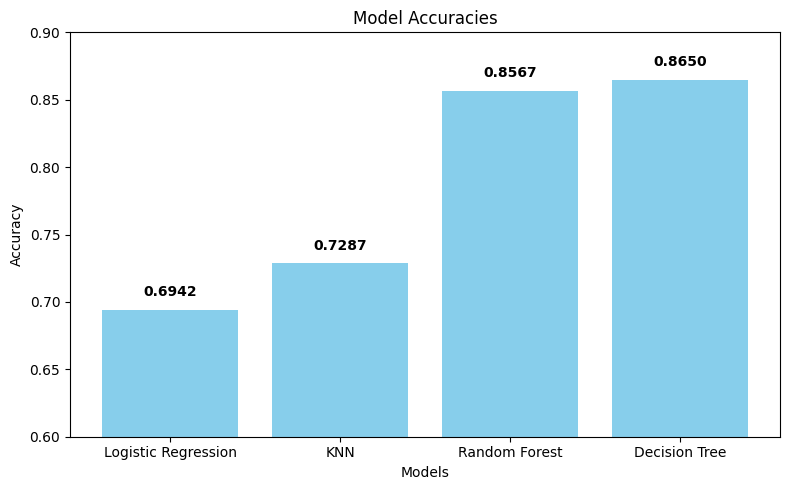

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree']
accuracies = [0.6942, 0.7287, 0.8567, 0.8650]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.6, 0.9)
plt.tight_layout()

# Display the values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', color='black', fontweight='bold')

plt.show()


**Conclusion** : we applied various machine learning models to predict customer churn in a subscription-based service. The models' performances were as follows:

1. Logistic Regression: Achieved an accuracy of 69.42%. It provided a moderate level of accuracy in predicting churn behavior.

2. K-Nearest Neighbors (KNN): Achieved an accuracy of 72.87%. It outperformed Logistic Regression slightly in terms of accuracy.

3. Random Forest: Achieved an accuracy of 85.67%. It showed a significant improvement in accuracy compared to the previous models.

4. Decision Tree: Achieved the highest accuracy of 86.50%. It demonstrated the best performance among all models.

Based on the results,The Decision Tree model performed the best in terms of accuracy among the tested models, followed closely by the Random Forest model. Both models have demonstrated good predictive capabilities on this churn prediction task.




